In [1]:
from causalnex.structure.notears import from_pandas
import pandas as pd

import sys,os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from logger_util import CreateLogger
import traceback

In [2]:

logger = CreateLogger('CausalInference')
logger = logger.get_default_logger()


In [211]:
try:
    data=pd.read_csv("../data/data.csv")
except FileNotFoundError:
    logger.exception("File Could not be found")
except:
    logger.exception("Error occured couldn't read file")
    traceback.print_exc()
logger.info("Data Read")

CausalInference:INFO->Data Read
INFO:CausalInference:Data Read


In [212]:
try:
    lis = ['Unnamed: 32','id']
    data.drop(lis, axis = 1, inplace = True)
    
    logger.info("Drop unnamed: 32 and id column")   
except KeyError as e :
    logger.exception("Error Column not found") 
except:
    logger.exception("Error occured couldn't drop columns") 
    traceback.print_exc()

CausalInference:INFO->Drop unnamed: 32 and id column
INFO:CausalInference:Drop unnamed: 32 and id column


In [5]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [17]:
scaled = (data - data.mean()) / (data.std()) 

In [117]:
from sklearn.preprocessing import normalize

In [122]:
normalized=(data-data.min())/(data.max()-data.min())

In [18]:
import numpy as np
struct_data = scaled.copy()

non_numeric_columns = struct_data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index([], dtype='object')


In [13]:
struct_data = data[["diagnosis","radius_mean", "perimeter_mean", "area_mean",  "concavity_mean","concave points_mean", "radius_worst", "perimeter_worst", "area_worst", "concavity_worst", "concave points_worst"]].copy()

In [137]:
sm = from_pandas(normalized, w_threshold=0.8)

In [9]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

In [ ]:
import importlib
import causalnex
importlib.reload(causalnex)

<module 'causalnex' from 'D:\\Users\\same\\anaconda3\\lib\\site-packages\\causalnex\\__init__.py'>

In [ ]:
import 

In [11]:

from IPython.display import Image

D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


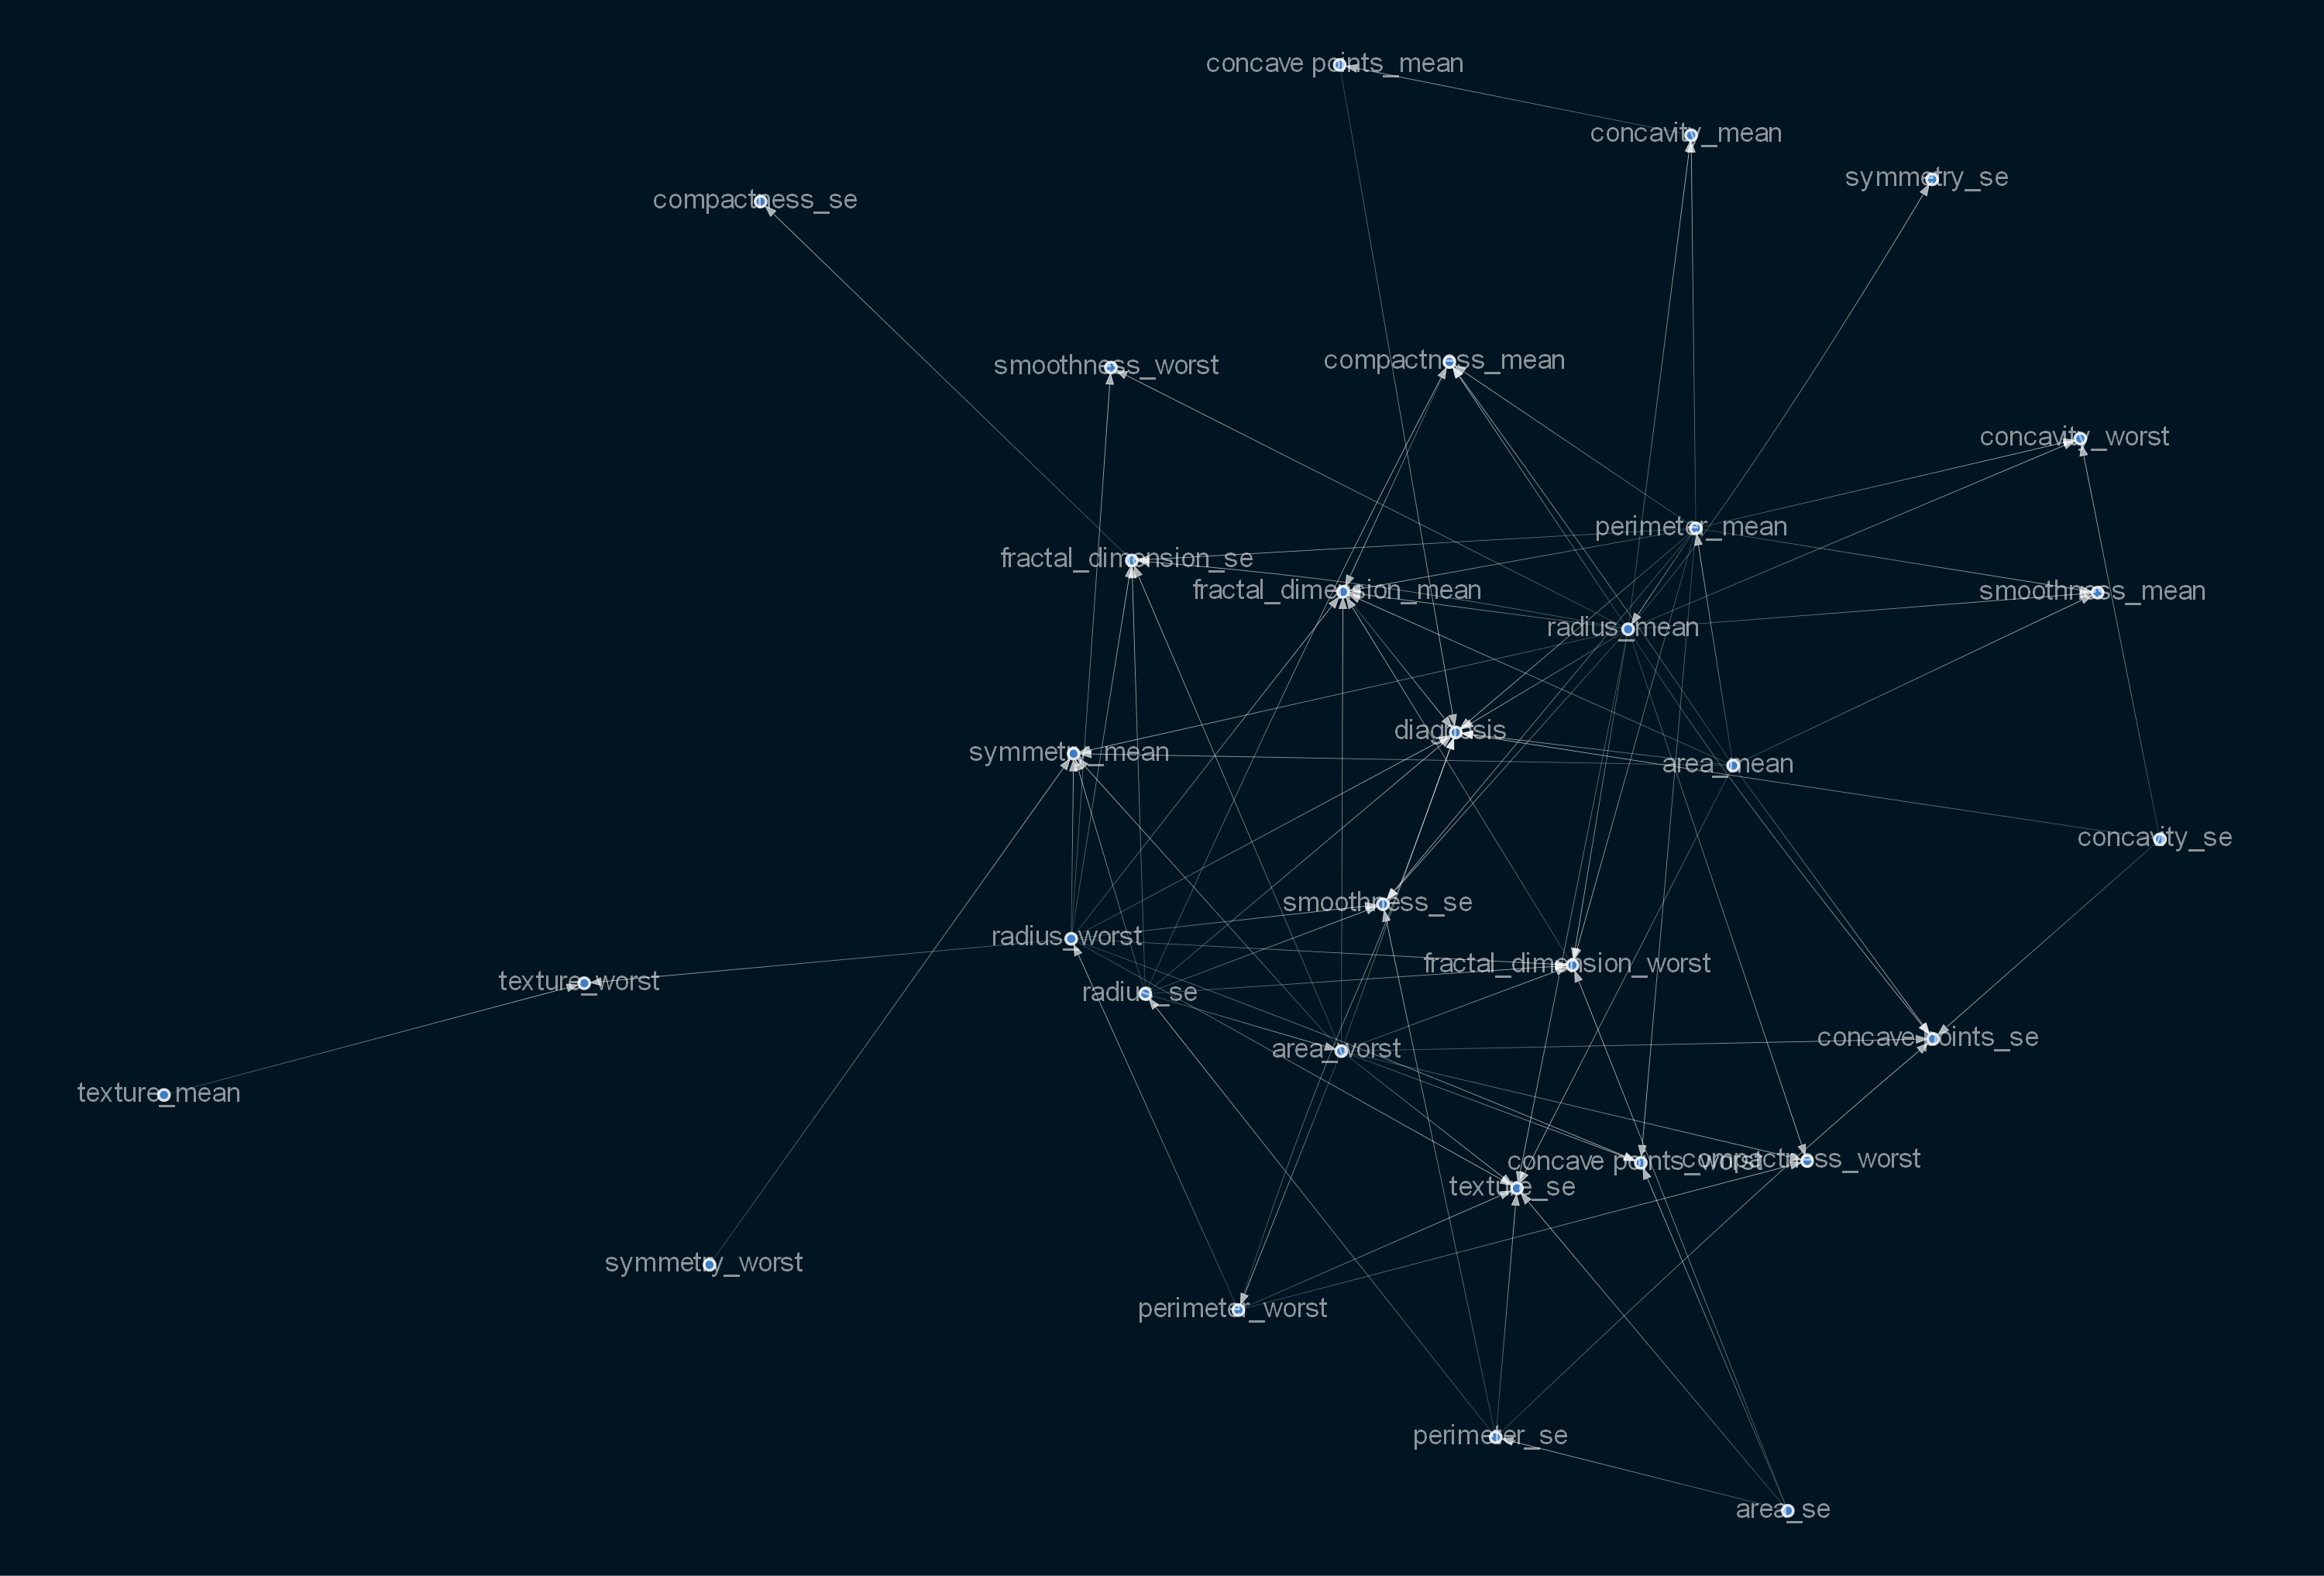

In [138]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':10},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

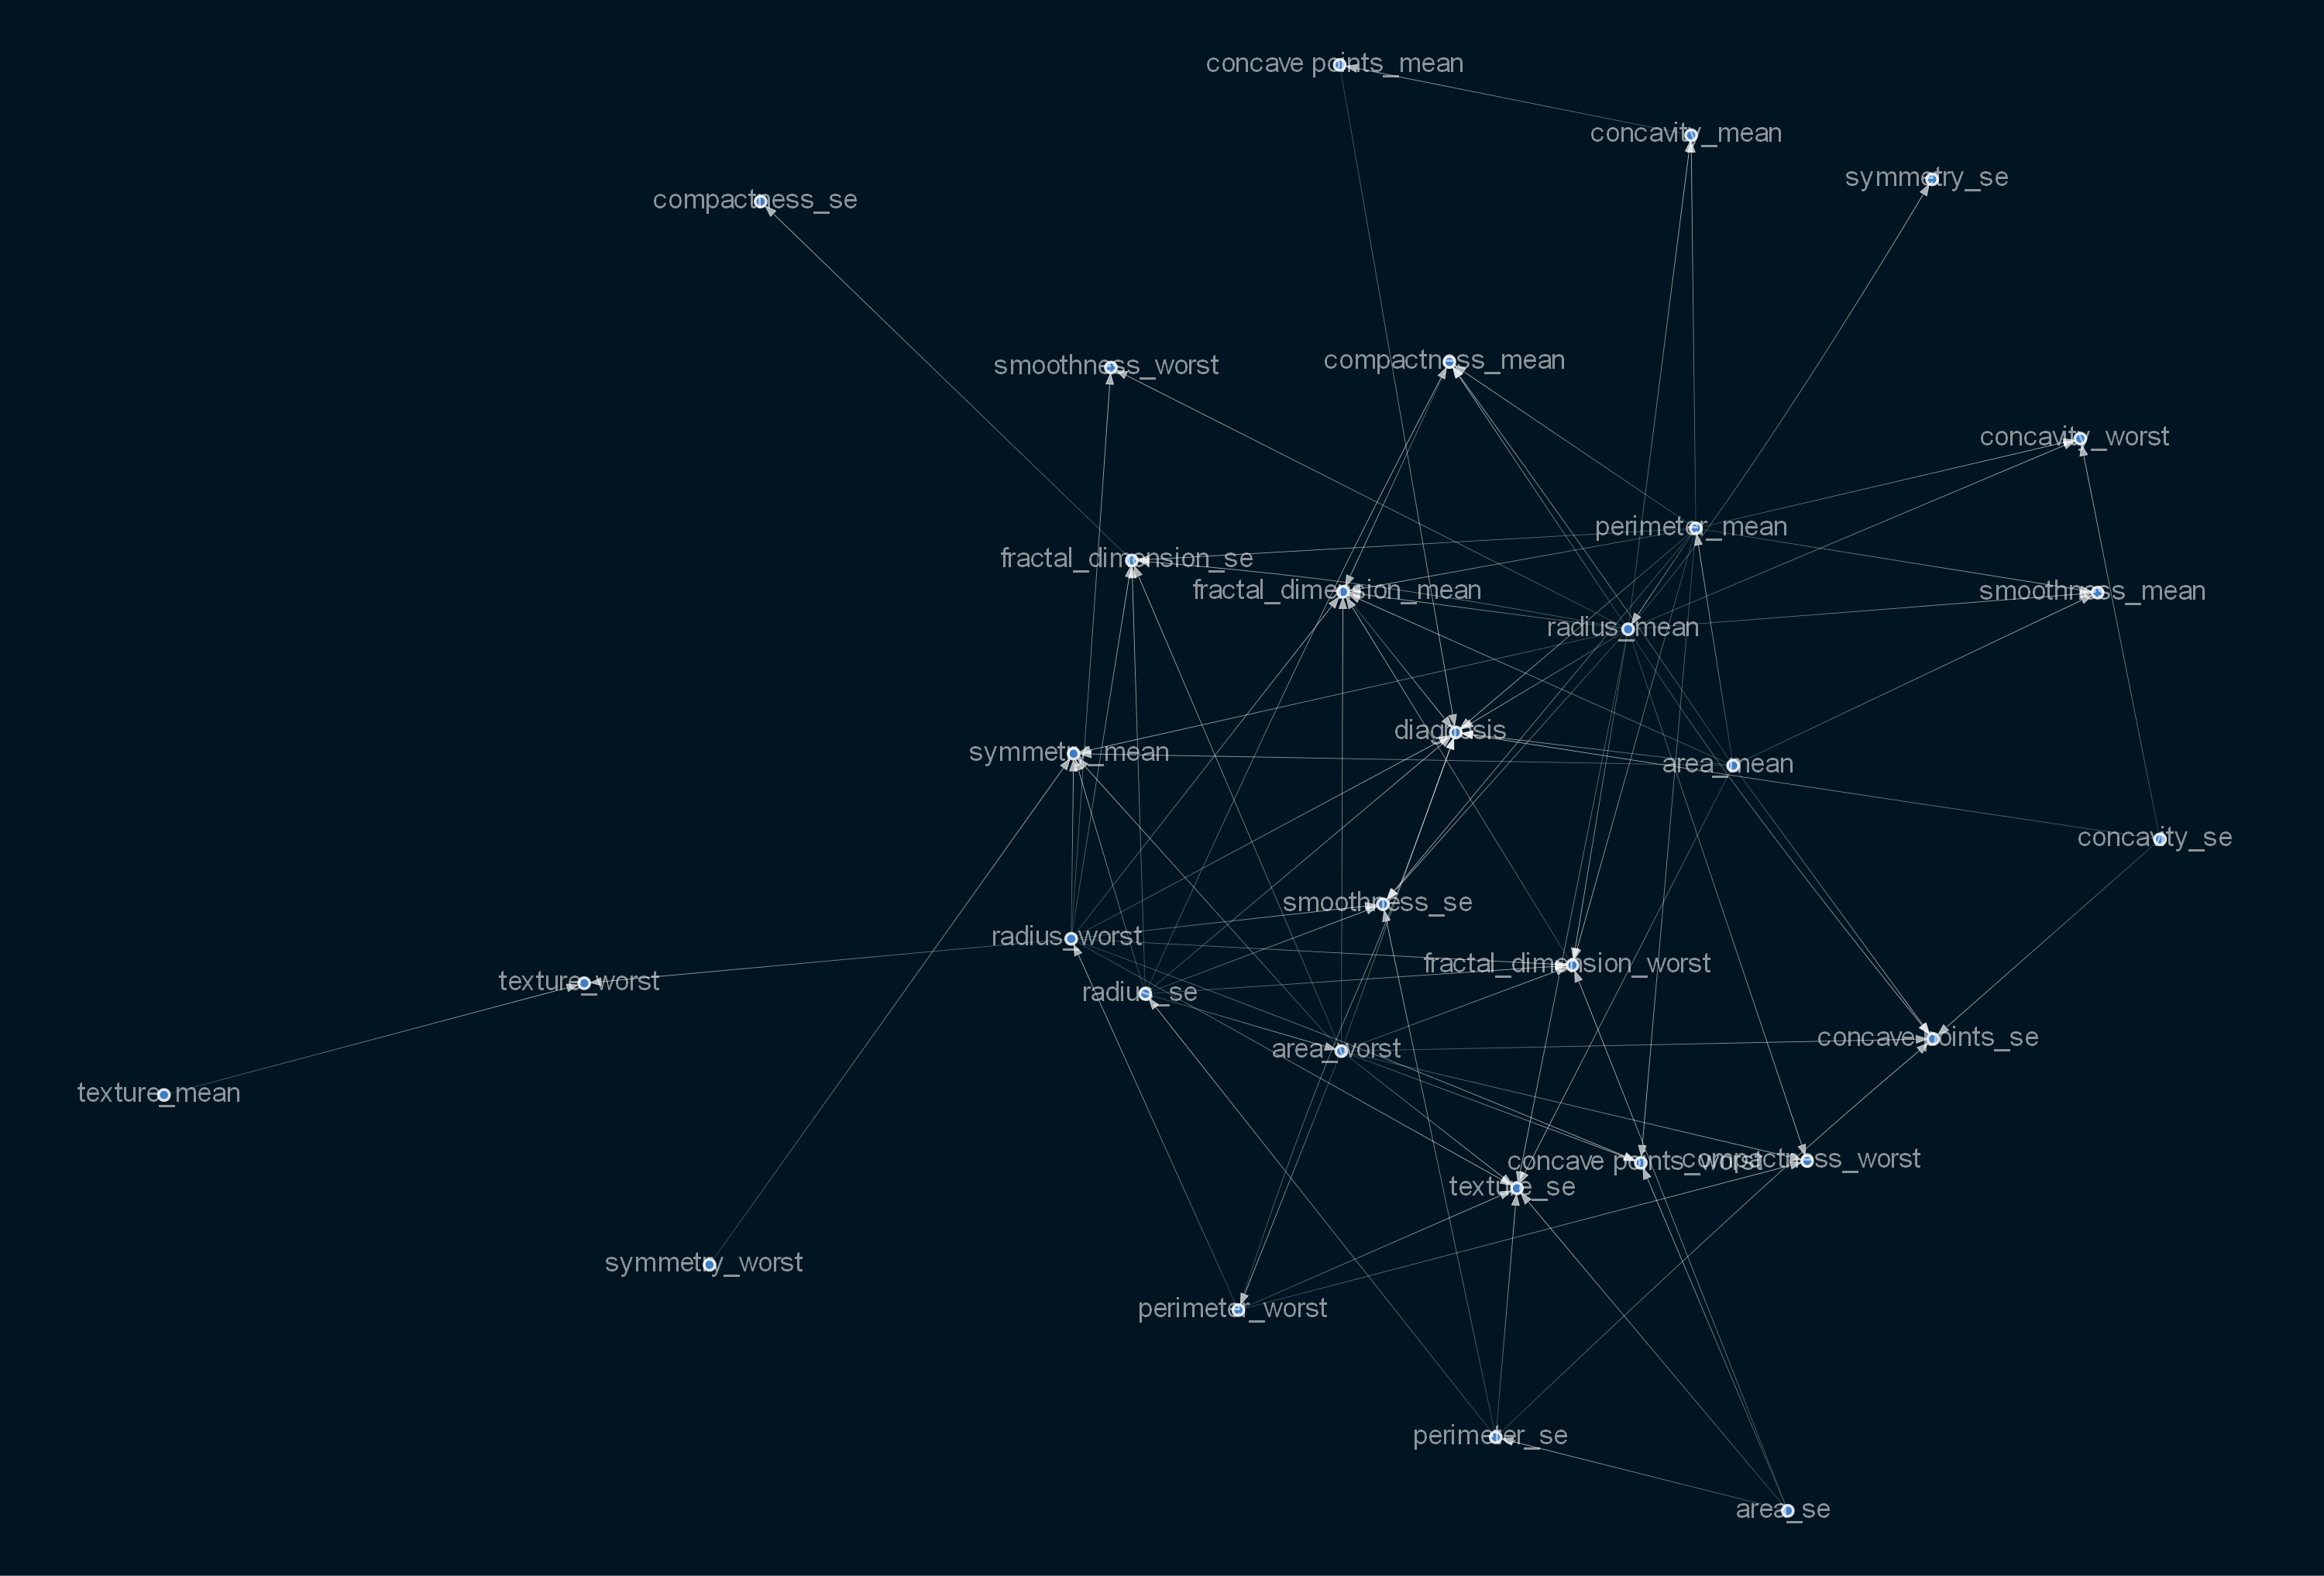

In [139]:
viz = plot_structure(
    sm.get_target_subgraph("diagnosis"),
    graph_attributes={"scale": "2.0", 'size':10},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [31]:
from causalnex.structure.notears import from_pandas_lasso

In [125]:
sm2 = from_pandas_lasso(normalized, w_threshold=0.8, beta=0.9)


In [93]:
sm2.edges

OutEdgeView([])

D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


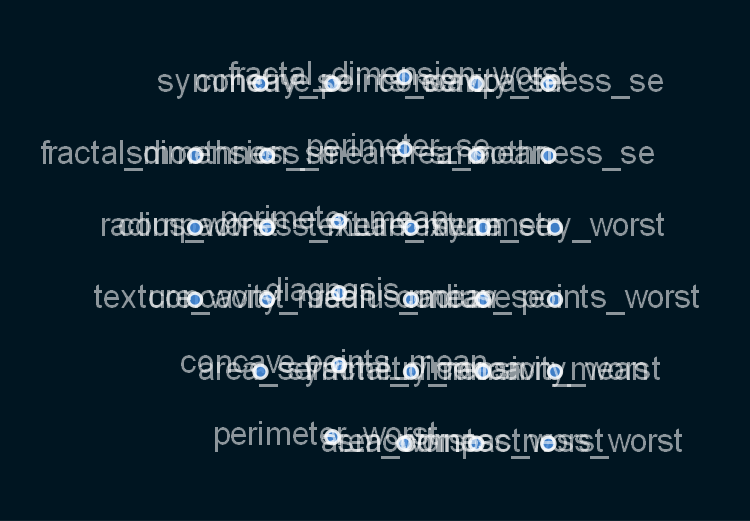

In [126]:
viz2 = plot_structure(
    sm2,
    graph_attributes={"scale": "6.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz2.draw(prog="circo",format='png'))

In [127]:
data_outliers=normalized.copy()

In [128]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

for i in data_outliers.columns:
    fix_outlier(data_outliers,i)


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

In [149]:
sm3 = from_pandas(data_outliers, w_threshold=0.8)

D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'compactness_se', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'compactness_se', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


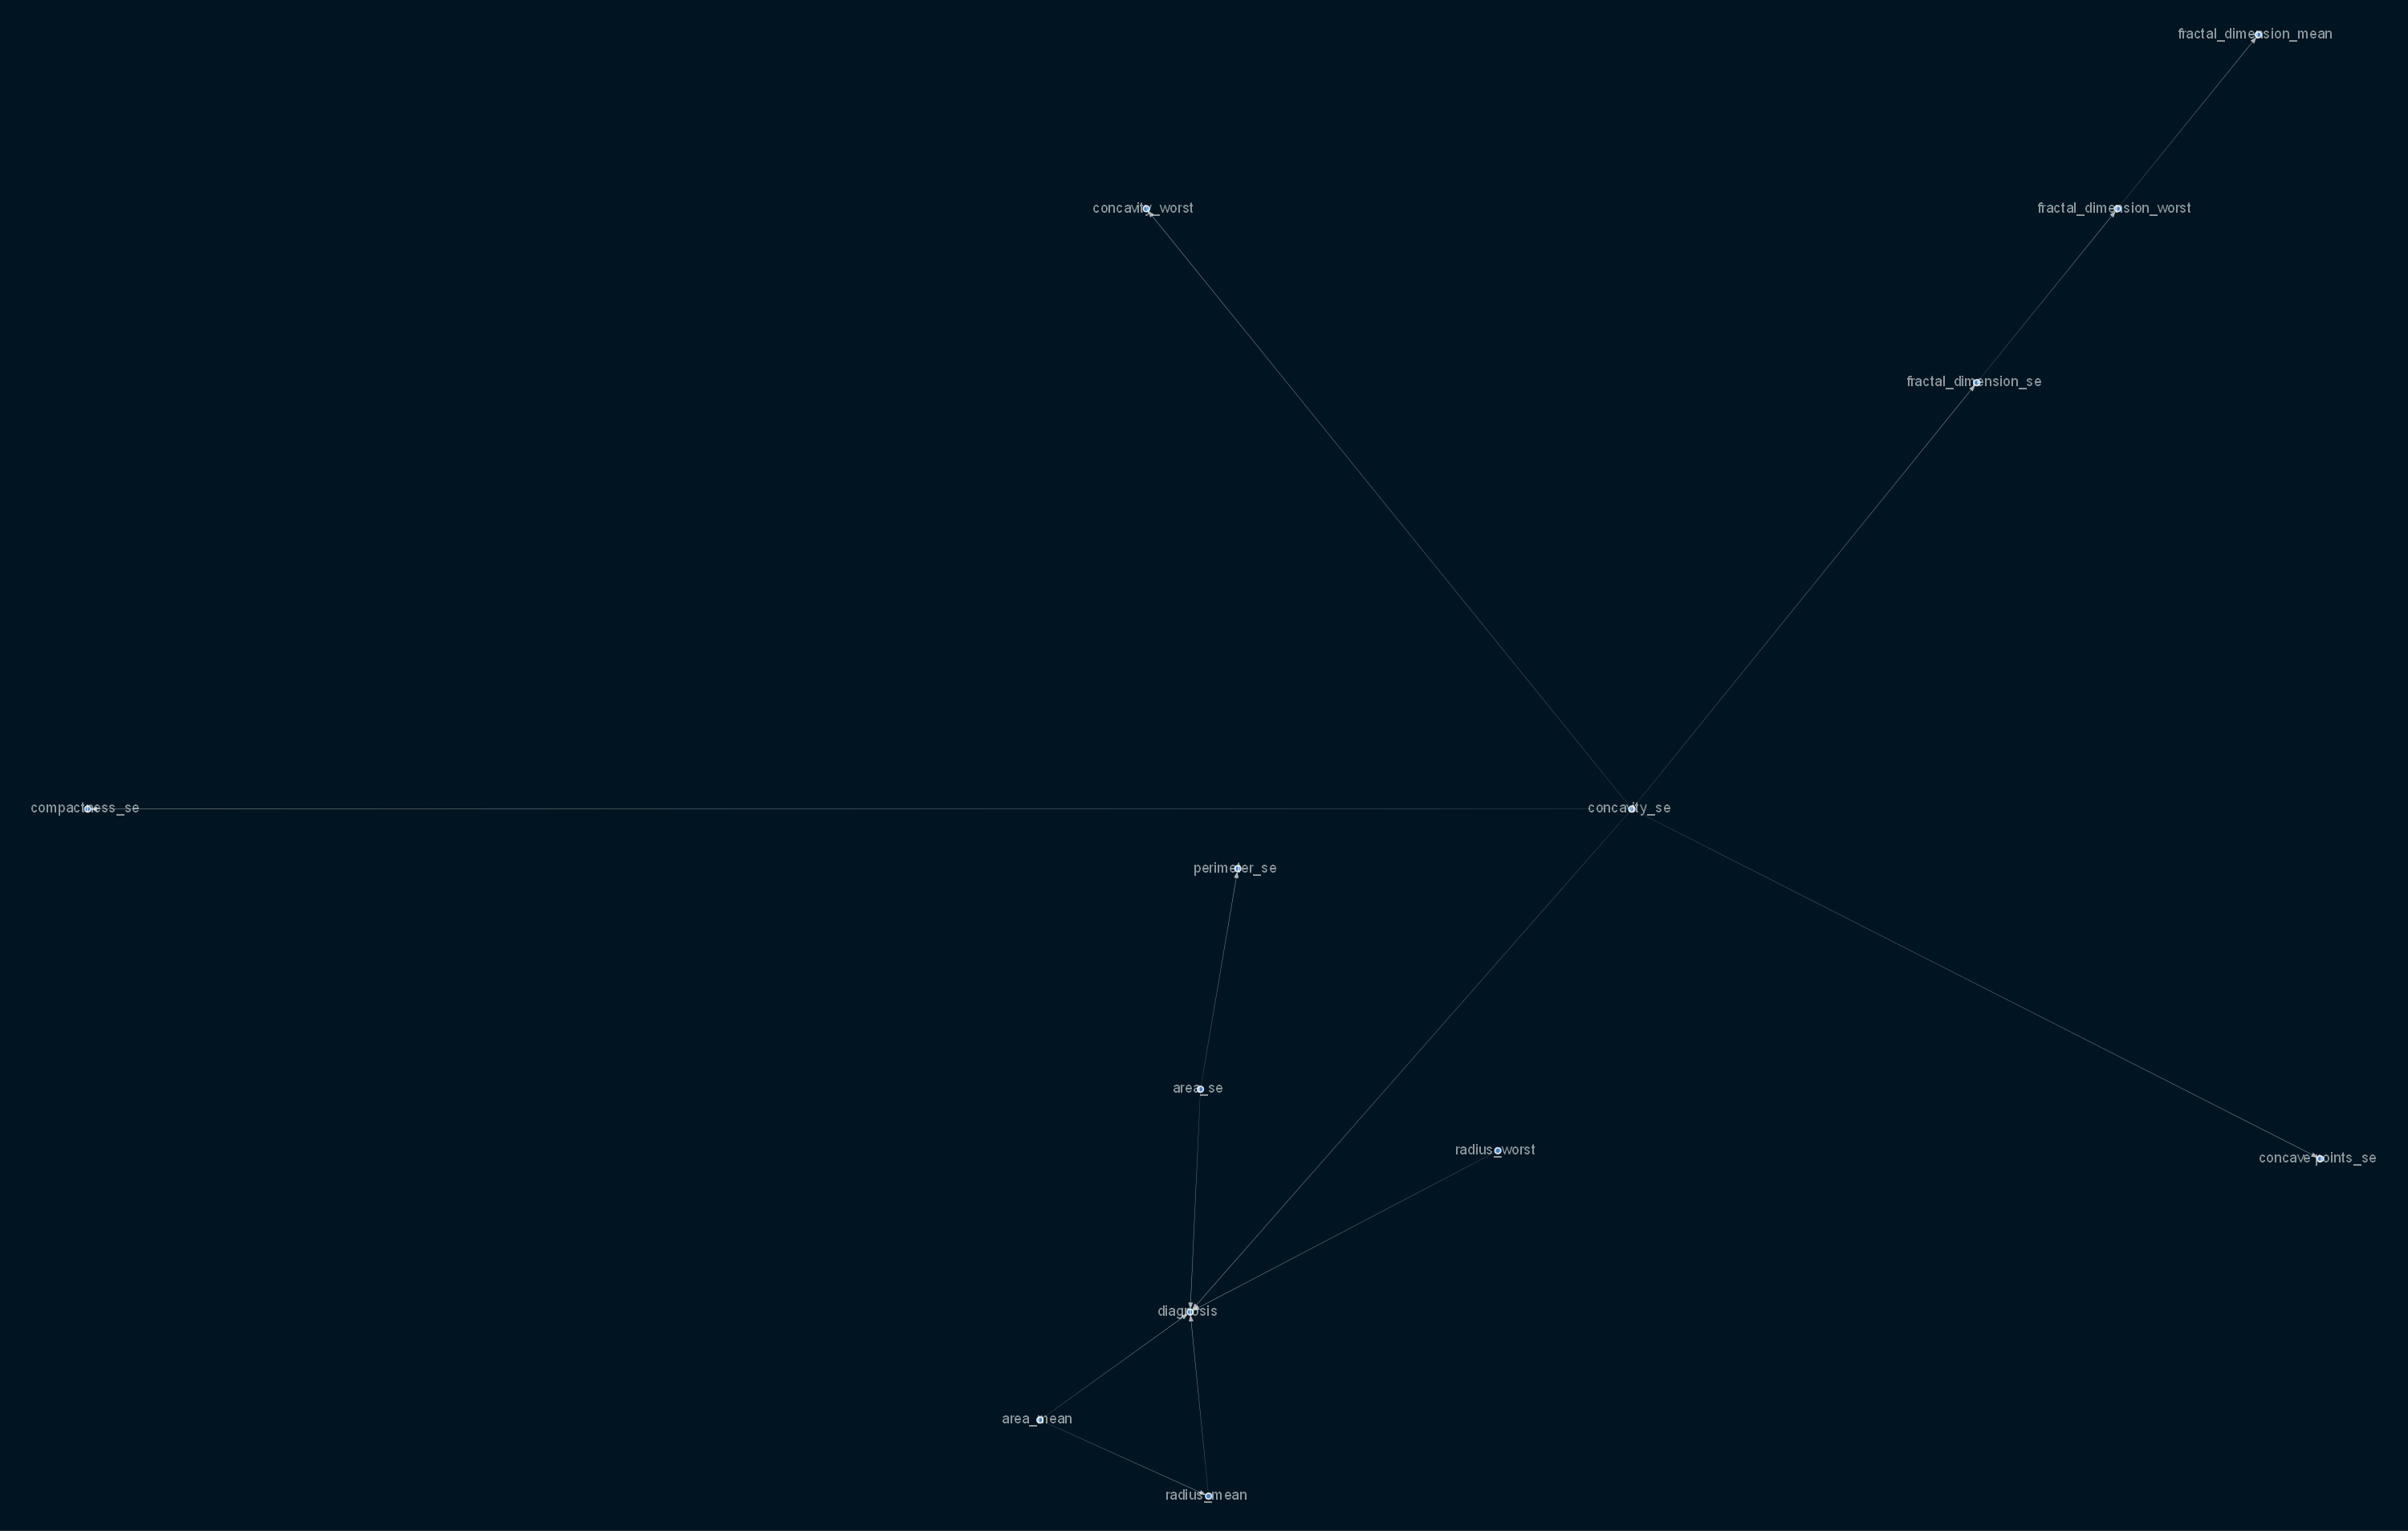

In [150]:
viz3 = plot_structure(
    sm3.get_target_subgraph('diagnosis'),
    graph_attributes={"scale": "2.0", 'size':10},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz3.draw(prog="circo",format='png'))

In [147]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

jaccard_similarity(sm3.edges(), sm2.edges())

0.0

In [144]:
set(sm.get_target_subgraph('diagnosis').edges() ).intersection(sm3.get_target_subgraph('diagnosis').edges() )

{('area_mean', 'diagnosis'),
 ('area_se', 'perimeter_se'),
 ('concavity_se', 'concavity_worst'),
 ('concavity_se', 'diagnosis'),
 ('radius_mean', 'diagnosis')}

In [148]:

jaccard_similarity(sm3.get_target_subgraph('diagnosis').edges(), sm.get_target_subgraph('diagnosis').edges())

0.057

In [77]:
sm2.edges()

OutEdgeView([])

In [141]:
jaccard_similarity(sm2.edges(), sm.edges())

0.0

In [151]:
incremental=normalized.copy()
train=incremental.sample(frac=0.8,random_state=200) 
test=incremental.drop(train.index)

In [152]:
full_train = from_pandas(train, w_threshold=0.8)

In [153]:
len(train)


455

In [162]:
num=len(train)//13

for i in range(1,14):
    index=i*num
    partial= from_pandas(train.iloc[:index], w_threshold=0.8)
    print(jaccard_similarity(partial.edges(),full_train.edges()))

0.253
0.308
0.313
0.34
0.441
0.432
0.459
0.452
0.599
0.627
0.669
0.813
1.0


In [167]:
incremental_outliers=data_outliers.copy()
train_outliers=incremental_outliers.sample(frac=0.8,random_state=200) 
test_outliers=incremental_outliers.drop(train.index)

In [168]:
full_train_outliers = from_pandas(train_outliers, w_threshold=0.8)

In [169]:
for i in range(1,14):
    index=i*num
    partial= from_pandas(train_outliers.iloc[:index], w_threshold=0.8)
    print(jaccard_similarity(partial.edges(),full_train_outliers.edges()))

0.052
0.114
0.111
0.153
0.232
0.269
0.432
0.5
0.533
0.538
0.652
0.6
1.0


D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


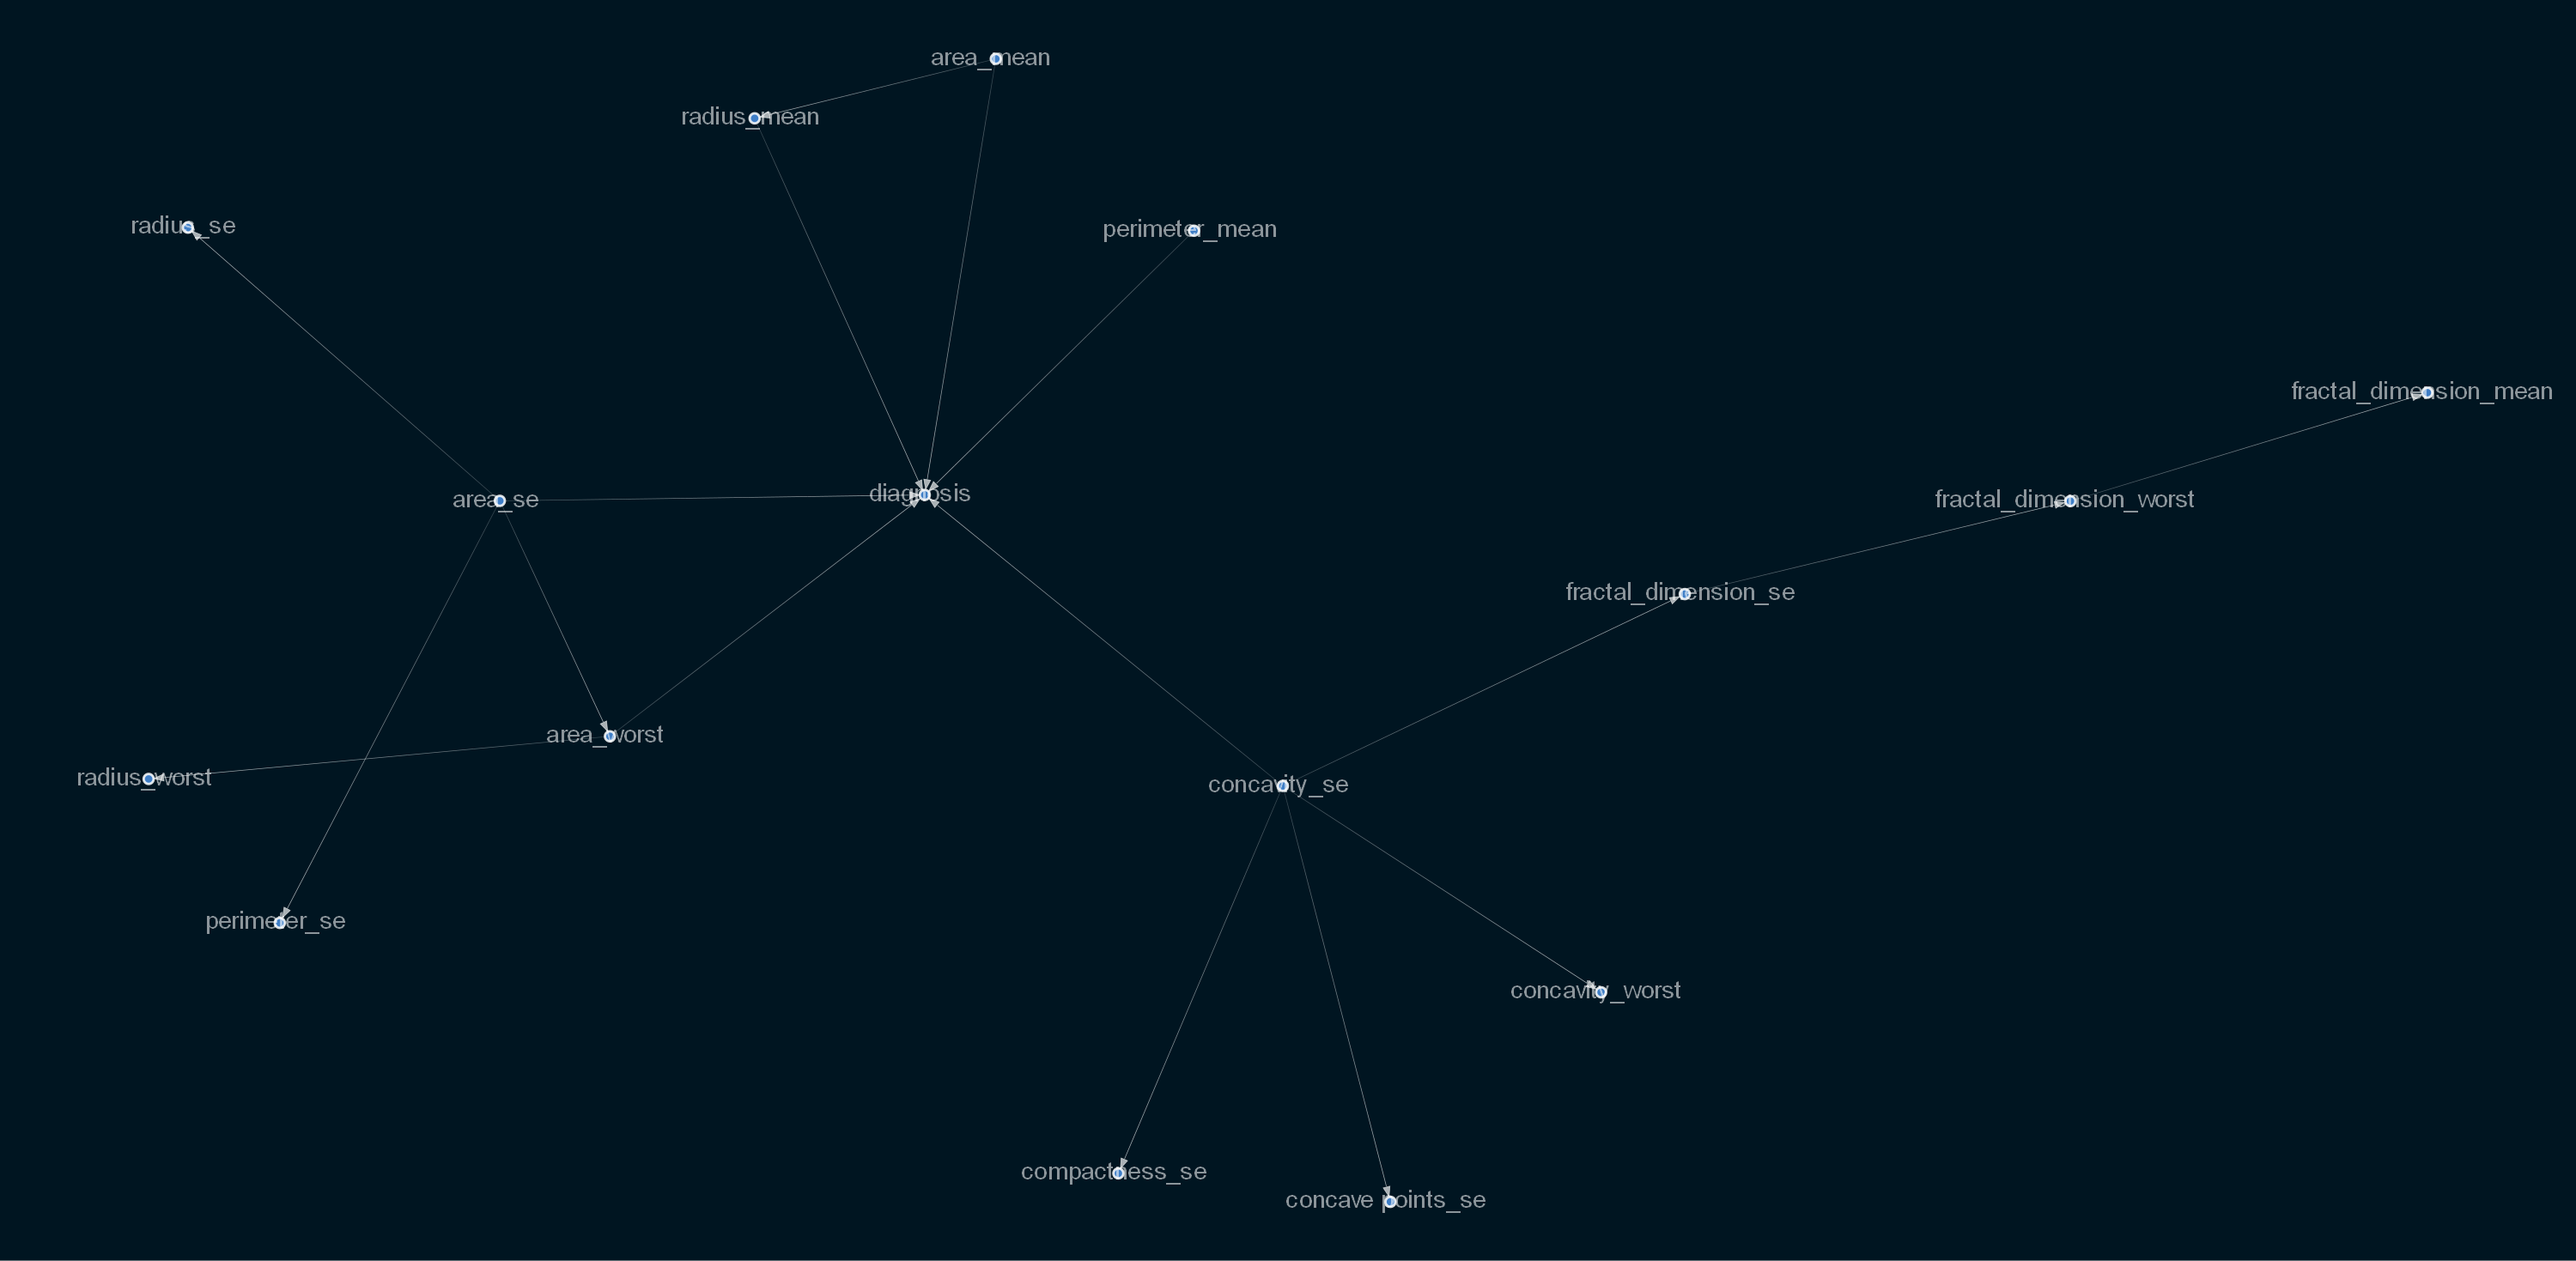

In [172]:
viz5 = plot_structure(
    full_train_outliers.get_target_subgraph('diagnosis'),
    graph_attributes={"scale": "2.0", 'size':10},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz5.draw(format='png'))

In [173]:
from sklearn.linear_model import LogisticRegression

In [271]:
y_train=train.diagnosis
x_train=train.drop("diagnosis",axis=1)
y_test=test.diagnosis
x_test=test.drop("diagnosis",axis=1)

In [267]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [272]:
model = LogisticRegression().fit(x_train, y_train)
train_acc = model.score(x_train, y_train)

y_pred = model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)

In [273]:
train_acc

0.9714285714285714

In [274]:
test_acc

0.9385964912280702

In [261]:
selected_train=train.filter(a[1:],axis=1)
selected_test=test.filter(a[1:],axis=1)

In [257]:
a=list(full_train.get_target_subgraph('diagnosis').nodes)

In [262]:
y_train_selected=train_outliers.diagnosis
x_train_selected=selected_train
y_test_selected=test_outliers.diagnosis
x_test_selected=selected_test

In [275]:
model = LogisticRegression().fit(x_train_selected, y_train_selected)
train_acc = model.score(x_train_selected, y_train_selected)

y_pred = model.predict(x_test_selected)
test_acc = accuracy_score(y_test_selected, y_pred)

In [276]:
train_acc

0.9604395604395605

In [277]:
test_acc

0.9210526315789473

In [289]:
y=train.diagnosis
X=train.drop("diagnosis",axis=1)
names=train.drop("diagnosis",axis=1).columns

clf_all = LogisticRegression()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
scores = cross_val_score(clf_all, X, y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')

X = pd.DataFrame(X, columns=names)
y = pd.Series(y, name="NOT CANCER")
clf_all.fit(X, y)
for i in range(clf.coef_.shape[0]):
    print("MEAN EFFECT DIRECTIONAL CLASS {}:".format(i))
    print(pd.Series(clf_all.coef_[i, :], index=names).sort_values(ascending=False))

MEAN Score: 0.965
MEAN EFFECT DIRECTIONAL CLASS 0:
concave points_worst       2.786797
radius_worst               2.244815
concave points_mean        2.138063
texture_worst              2.084102
perimeter_worst            2.058725
radius_mean                1.782157
perimeter_mean             1.756013
area_worst                 1.612264
area_mean                  1.503692
smoothness_worst           1.474051
concavity_mean             1.430845
texture_mean               1.372707
concavity_worst            1.353826
symmetry_worst             1.218499
radius_se                  0.948732
compactness_worst          0.859122
perimeter_se               0.703332
area_se                    0.680289
smoothness_mean            0.605927
symmetry_mean              0.545831
compactness_mean           0.495140
fractal_dimension_worst    0.287516
concave points_se          0.235537
smoothness_se              0.111152
texture_se                 0.001826
symmetry_se               -0.126281
concavity_se 

In [281]:
scores

array([0.95604396, 0.98901099, 0.95604396, 0.95604396, 0.96703297])

MEAN Score: 0.980
MEAN EFFECT DIRECTIONAL CLASS 0:
radius_se                  5.673166e-01
radius_worst               4.923715e-01
area_se                    4.558189e-01
concavity_mean             4.510892e-01
texture_worst              4.505126e-01
concave points_worst       3.769330e-01
concave points_mean        3.749623e-01
area_worst                 3.747276e-01
fractal_dimension_worst    3.114119e-01
concavity_worst            2.623640e-01
smoothness_se              2.121943e-01
perimeter_worst            2.053342e-01
symmetry_worst             1.798248e-01
concave points_se          9.952852e-02
texture_mean               4.482051e-02
smoothness_mean            1.697239e-02
compactness_mean           8.042743e-03
compactness_worst          8.559853e-07
symmetry_mean             -3.570469e-03
perimeter_se              -1.257421e-02
concavity_se              -1.614212e-02
area_mean                 -2.953668e-02
perimeter_mean            -7.421124e-02
smoothness_worst          -8.

D:\Users\same\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


(<Figure size 940.32x956.88 with 1 Axes>, <AxesSubplot:>)

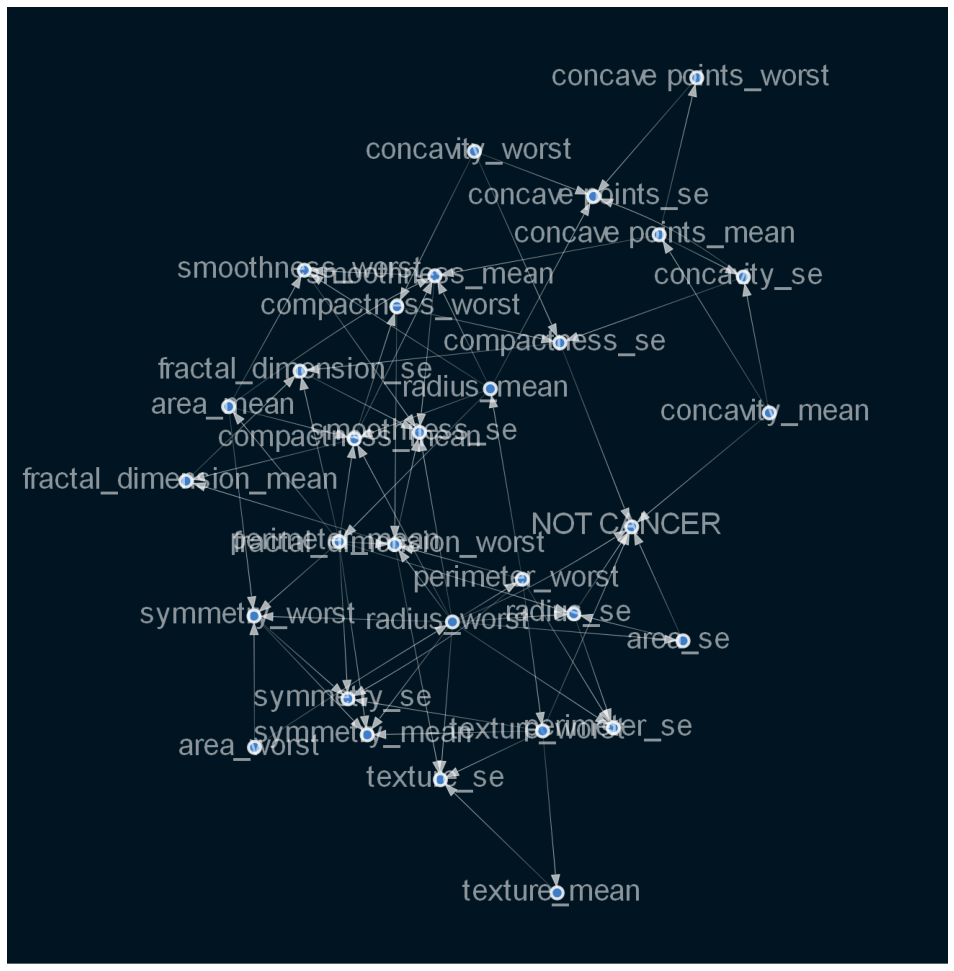

In [282]:
from causalnex.structure import DAGClassifier
clf = DAGClassifier(
    alpha=0.1,
    beta=0.9,
    hidden_layer_units=[5],
    fit_intercept=True,
    standardize=True
)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
scores = cross_val_score(clf, X, y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')

X = pd.DataFrame(X, columns=names)
y = pd.Series(y, name="NOT CANCER")
clf.fit(X, y)
for i in range(clf.coef_.shape[0]):
    print("MEAN EFFECT DIRECTIONAL CLASS {}:".format(i))
    print(pd.Series(clf.coef_[i, :], index=names).sort_values(ascending=False))
clf.plot_dag(True)

In [285]:
y_test=test.diagnosis
x_test=test.drop("diagnosis",axis=1)

y_pred_baseline = clf.predict(x_test)
test_acc_baseline = accuracy_score(y_test, y_pred_baseline)


In [287]:
print(f"Acuracy of model is {test_acc_baseline}")

Acuracy of model is 0.9473684210526315


In [290]:

y_pred = clf_all.predict(x_test)
test_ac = accuracy_score(y_test, y_pred)

In [291]:
print(f"Acuracy of model is {test_ac}")

Acuracy of model is 0.9385964912280702
